# Loan Data Cleaning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### % of missing values for each column

In [6]:
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Total % of missing values

In [7]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

1.8667000751691305

### Heatmap showcasing no. of missing values in each column


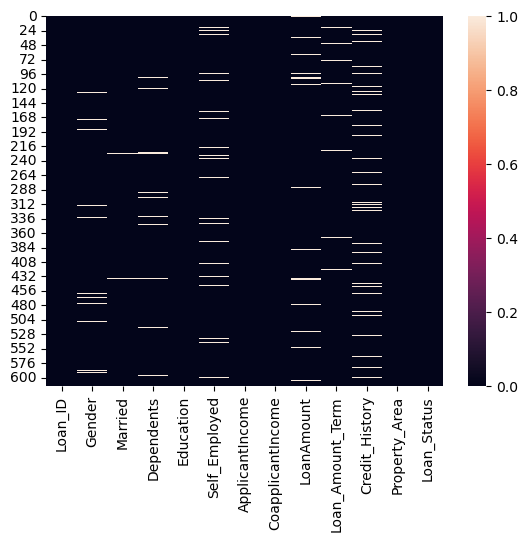

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [11]:
df['Gender'].isnull().sum()

0

### Filling all columns with categorical data with fillna mode filling

In [12]:
for i in df.select_dtypes(include=object).columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df.select_dtypes(include=object).isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

### Filling all columns with numerical data with sklearn imputation

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
si = SimpleImputer(strategy='mean')
imputed_arr = si.fit_transform(df[numerical_columns])
imputed_arr

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [17]:
new_df = pd.DataFrame(imputed_arr,columns=numerical_columns)

In [18]:
new_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [19]:
df[numerical_columns]= new_df         #writing filled columns onto original dataframe
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### One Hot Encoding nominal data

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe = OneHotEncoder()

In [22]:
arr_enc = ohe.fit_transform(df[['Gender','Married','Education','Self_Employed','Loan_Status']]).toarray()

In [23]:
df_enc = pd.DataFrame(arr_enc,columns=['Gender_Female','Gender_Male','Married_No','Married_Yes','Graduate_Yes','Graduate_No','Self_Employed_No','Self_Employed_Yes','Loan_Status_No','Loan_Status_Yes'])

In [24]:
df_enc.drop(['Gender_Female','Married_No','Graduate_No','Self_Employed_No','Loan_Status_No'], axis=1,inplace=True)
df.drop(['Gender','Married','Education','Self_Employed','Loan_Status'],axis=1,inplace=True)

In [25]:
df = pd.concat([df,df_enc],axis=1)

### Ordinal Encoding ordinal data

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
location= [['Urban', 'Semiurban','Rural']]

In [28]:
oe = OrdinalEncoder(categories=location)

In [29]:
df['Property_Area'] = oe.fit_transform(df[['Property_Area']])

### Outlier Detection with BoxPlot

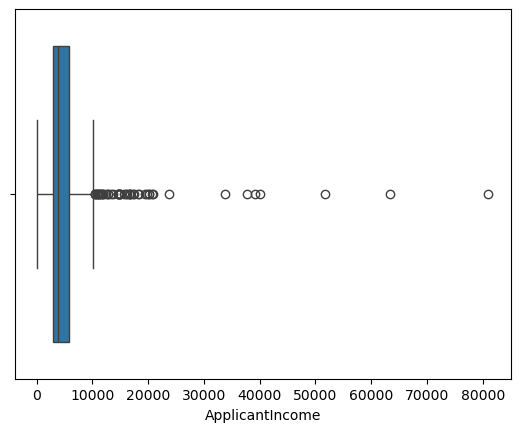

In [30]:
sns.boxplot(x= 'ApplicantIncome', data = df)
plt.show()

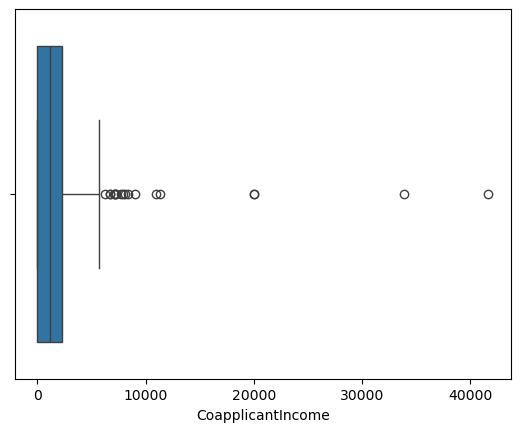

In [31]:
sns.boxplot(x='CoapplicantIncome', data = df )
plt.show()

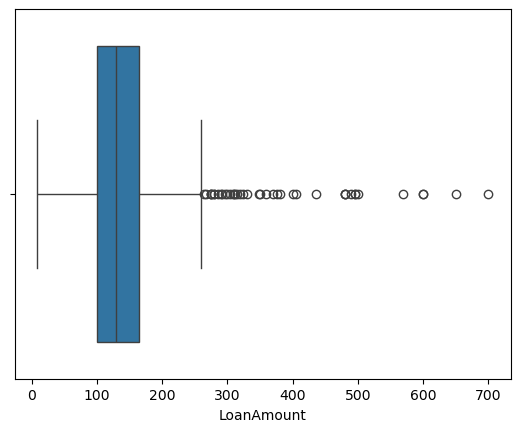

In [32]:
sns.boxplot(x = 'LoanAmount', data = df)
plt.show()

In [33]:
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Graduate_Yes,Self_Employed_Yes,Loan_Status_Yes
0,LP001002,0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,LP001003,1,4583.0,1508.0,128.000000,360.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0
2,LP001005,0,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,LP001006,0,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,LP001008,0,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900.0,0.0,71.000000,360.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0
610,LP002979,3+,4106.0,0.0,40.000000,180.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
611,LP002983,1,8072.0,240.0,253.000000,360.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
612,LP002984,2,7583.0,0.0,187.000000,360.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


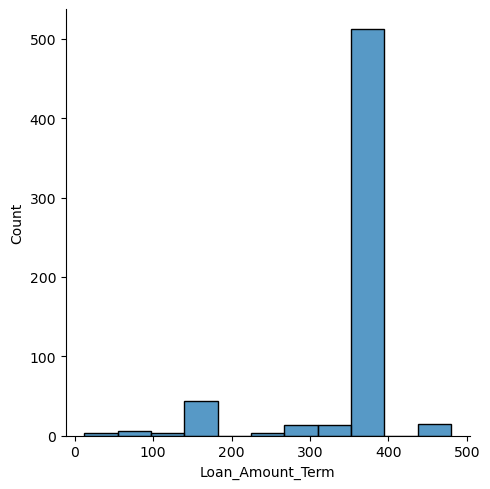

In [36]:
sns.displot(x = 'Loan_Amount_Term', data = df)
plt.show()